<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Distribution" data-toc-modified-id="Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution</a></span></li><li><span><a href="#Permutation-Test" data-toc-modified-id="Permutation-Test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Permutation Test</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#F---Statistics" data-toc-modified-id="F---Statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>F - Statistics</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Methodology

The chosen statistical testing for this analysis is ANOVA (Analysis of Variance) due to the purpose of this analysis which is to compare the gross income of each store branch.

ANOVA is chosen because we have multiple categories of a categorical variable and a continuous variable.

https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/

Asymmetrical distributions like the F and chi-square distributions have only one tail. This means that analyses such as ANOVA and chi-square tests do not have a “one-tailed vs. two-tailed” option, because the distributions they are based on have only one tail.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import random
import matplotlib.pyplot as plt
import plotly.express as px

# Load Data

In [2]:
df = pd.read_csv("supermarket_sales_preprocessed.csv")
df

,date_time,invoice_id,branch,city,customer_type,gender,product_line,payment,branch_location,total,gross_income,rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,A - Yangon,548.9715,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,C - Naypyitaw,80.2200,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,A - Yangon,340.5255,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet,A - Yangon,489.0480,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet,A - Yangon,634.3785,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet,C - Naypyitaw,42.3675,2.0175,6.2
996,2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet,B - Mandalay,1022.4900,48.6900,4.4
997,2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,Cash,A - Yangon,33.4320,1.5920,7.7
998,2019-02-22 15:33:00,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,Cash,A - Yangon,69.1110,3.2910,4.1


In [3]:
df_h = df[["branch_location", "gross_income"]]

# Hypothesis

α = 0.05
- H0: There are no significant differences between the average gross income amongst 3 store branches.
- H1: There are significant differences between the average gross income of at least 2 store branches.

# Distribution

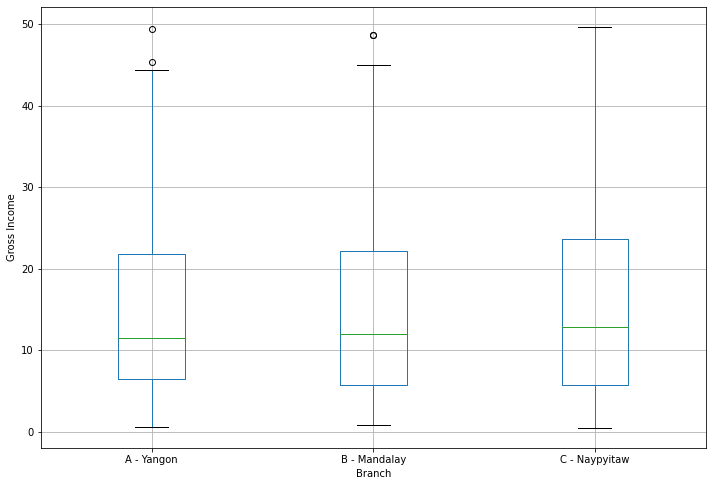

In [4]:
ax = df_h.boxplot(by="branch_location", column="gross_income", figsize=(10, 7))
ax.set_xlabel("Branch")
ax.set_ylabel("Gross Income")
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [5]:
df_h = df[["branch_location", "gross_income"]]

In [6]:
print(df_h.head())

  branch_location  gross_income
0      A - Yangon       26.1415
1   C - Naypyitaw        3.8200
2      A - Yangon       16.2155
3      A - Yangon       23.2880
4      A - Yangon       30.2085


# Permutation Test

In [7]:
observed_variance = df_h.groupby("branch_location").mean().var()[0]
print("Observed means:", df_h.groupby("branch_location").mean().values.ravel())
print("Variance:", observed_variance)
def perm_test(df_input):
    df_input = df_input.copy()
    df_input["gross_income"] = np.random.permutation(df_input["gross_income"].values)
    return df_input.groupby("branch_location").mean().var()[0]

print(perm_test(df_h))

Observed means: [14.87400147 15.2320241  16.05236738]
Variance: 0.3649482520363557
0.03338063289912652


Pr(Prob) 0.41


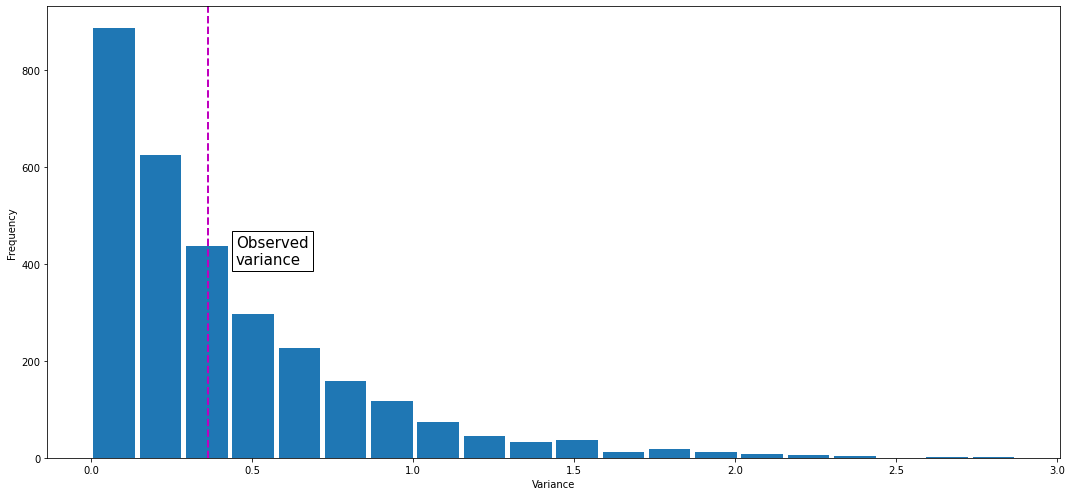

In [8]:
random.seed(1)
perm_variance = [perm_test(df_h) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(perm_variance, bins=20, rwidth=0.9)
ax.axvline(x = observed_variance, color='m', lw=2, linestyle="--")
ax.text(0.45, 400, 'Observed\nvariance', bbox={'facecolor':'white'}, fontsize=15)
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
df = pd.DataFrame(perm_variance, columns=["column"])
df.to_csv('perm_variance.csv', index = False)

## Conclusion

Since probability of observed value is > α = 0.05, we can't reject H0 which means:
- There's no significant differences between means of gross income of each branch.

# F - Statistics

In [10]:
%time model = smf.ols('gross_income ~ branch_location', data=df_h).fit()
                
%time aov_table = sm.stats.anova_lm(model)
print(aov_table)

Wall time: 27.9 ms
Wall time: 3.99 ms
                    df         sum_sq     mean_sq         F   PR(>F)
branch_location    2.0     242.602644  121.301322  0.884583  0.41321
Residual         997.0  136716.894906  137.128280       NaN      NaN


In [11]:
df_h.branch_location.unique()

array(['A - Yangon', 'C - Naypyitaw', 'B - Mandalay'], dtype=object)

In [12]:
%time res = stats.f_oneway(df_h[df_h.branch_location == 'A - Yangon'].gross_income, df_h[df_h.branch_location == 'B - Mandalay'].gross_income,df_h[df_h.branch_location == 'C - Naypyitaw'].gross_income)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

Wall time: 5.98 ms
F-Statistic: 0.4423
p-value: 0.2066


## Conclusion

Since p-value is > α = 0.05, we can't reject H0 which means:
- There's no significant differences between means of gross income of each branch.

In [17]:
df

,date_time,invoice_id,branch,city,customer_type,gender,product_line,payment,branch_location,total,gross_income,rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,A - Yangon,548.9715,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,C - Naypyitaw,80.2200,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,A - Yangon,340.5255,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet,A - Yangon,489.0480,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet,A - Yangon,634.3785,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet,C - Naypyitaw,42.3675,2.0175,6.2
996,2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet,B - Mandalay,1022.4900,48.6900,4.4
997,2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,Cash,A - Yangon,33.4320,1.5920,7.7
998,2019-02-22 15:33:00,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,Cash,A - Yangon,69.1110,3.2910,4.1


In [19]:
df = pd.read_csv('supermarket_sales_preprocessed.csv')
df_h = df[["branch", "city", "gross_income"]]
df_h

,branch,city,gross_income
0,A,Yangon,26.1415
1,C,Naypyitaw,3.8200
2,A,Yangon,16.2155
3,A,Yangon,23.2880
4,A,Yangon,30.2085
...,...,...,...
995,C,Naypyitaw,2.0175
996,B,Mandalay,48.6900
997,A,Yangon,1.5920
998,A,Yangon,3.2910


In [23]:
df_viz

,gross_income
branch_location,
A - Yangon,14.874001
B - Mandalay,15.232024
C - Naypyitaw,16.052367


In [30]:
df_h.groupby(["branch", "city"]).mean().round(2).reset_index().rename(columns={'branch':'Branch','city':'Location', 'gross_income':'Average of Gross Income'})

,Branch,Location,Average of Gross Income
0,A,Yangon,14.87
1,B,Mandalay,15.23
2,C,Naypyitaw,16.05
